# 决策树分析与可视化

本Jupyter Notebook包含了使用`scikit-learn`库进行决策树分析的过程，针对乳腺癌数据集，进行数据加载、可视化、建模和模型评估。
我们将通过以下步骤完成分析：
- 数据加载和预处理
- 可视化特征分布和标签分布
- 绘制相关性热力图
- 拟合决策树并评估模型
- 绘制学习曲线、混淆矩阵和ROC曲线

In [5]:
# 导入必要的库
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import pydot
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_absolute_error, mean_squared_error, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score
import warnings
warnings.filterwarnings('ignore')

## 数据加载与预处理

我们将加载乳腺癌数据集，并创建包含特征的DataFrame以便进行后续分析。

In [6]:
# 加载数据集
cancer = load_breast_cancer()

# 创建特征DataFrame
feature = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)

# 显示数据集信息
print('数据集的大小：{}'.format(feature.shape))
feature.head()

数据集的大小：(569, 30)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## 特征分布可视化

我们将为每个特征绘制直方图，以观察它们的分布情况。

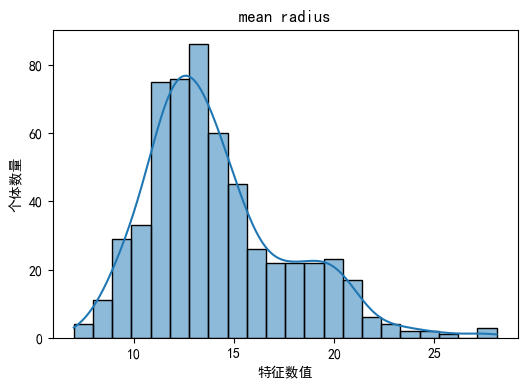

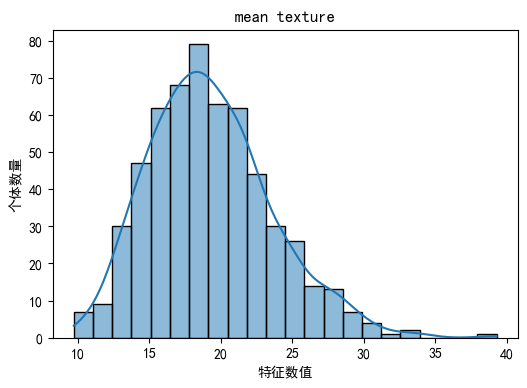

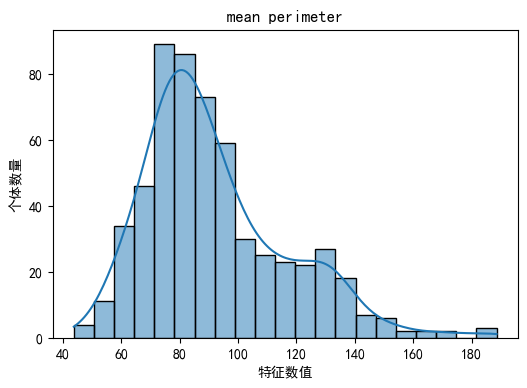

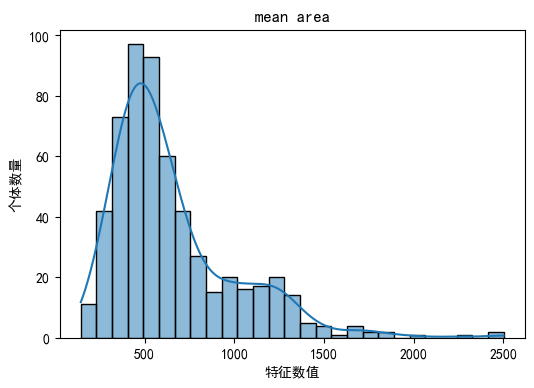

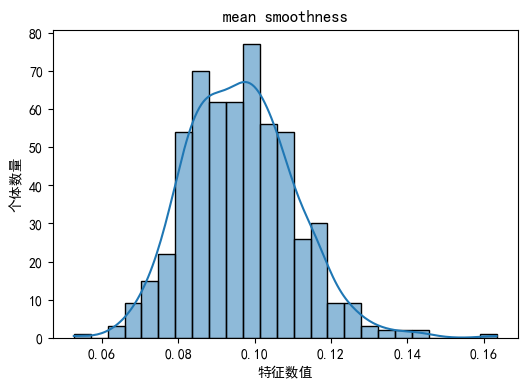

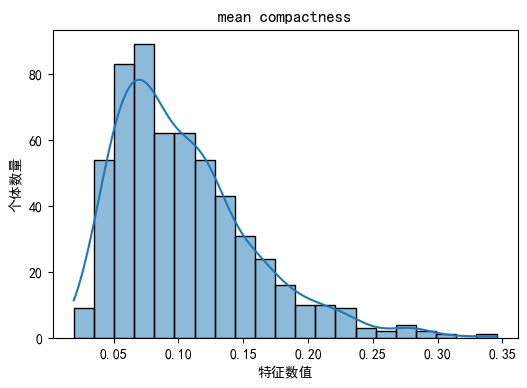

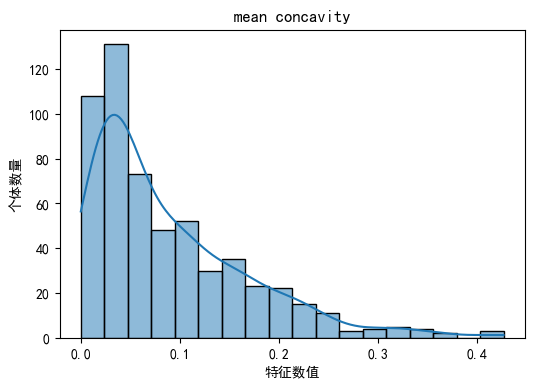

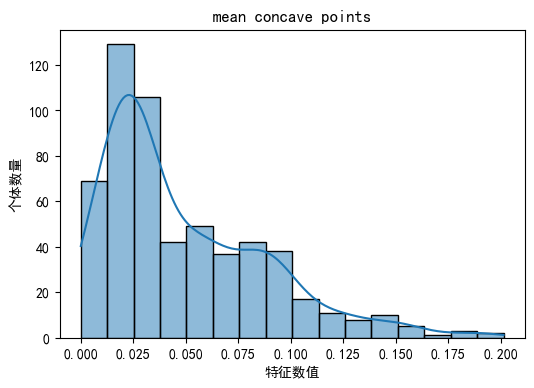

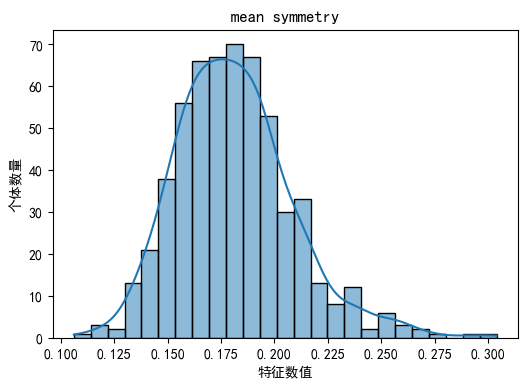

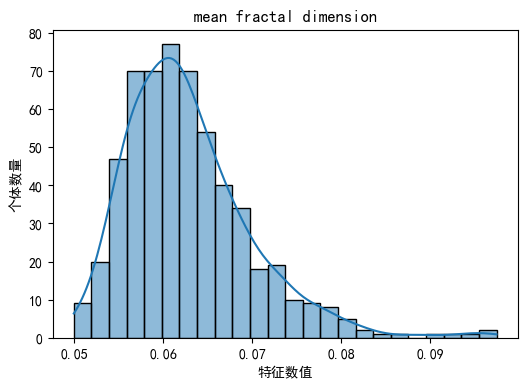

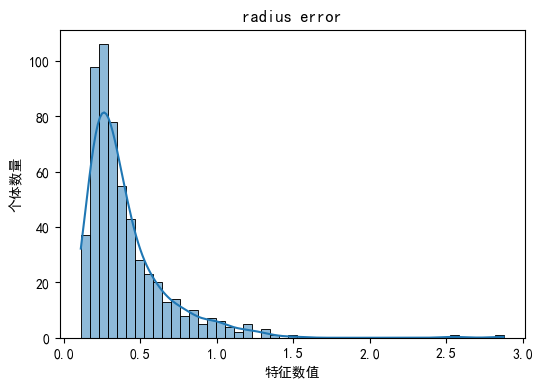

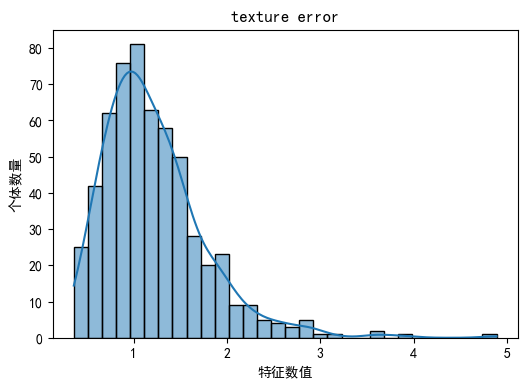

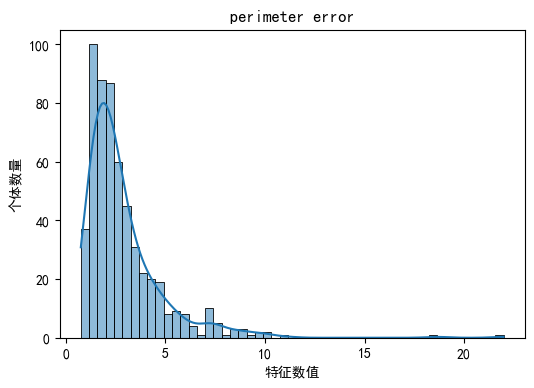

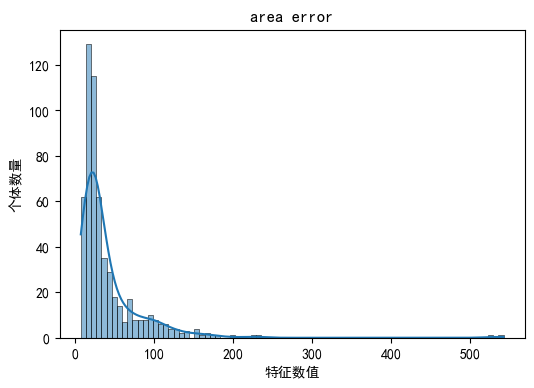

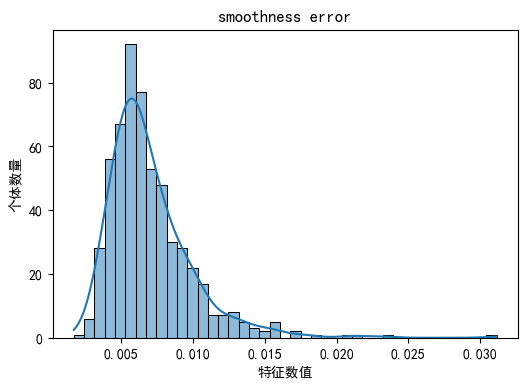

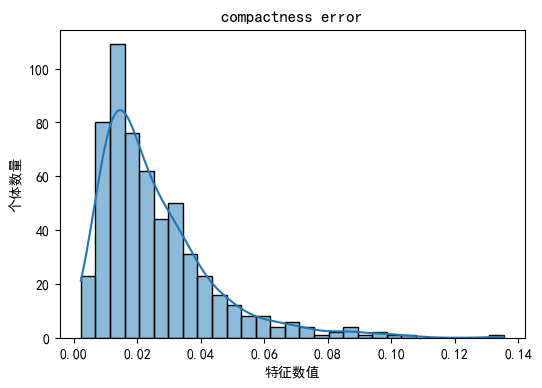

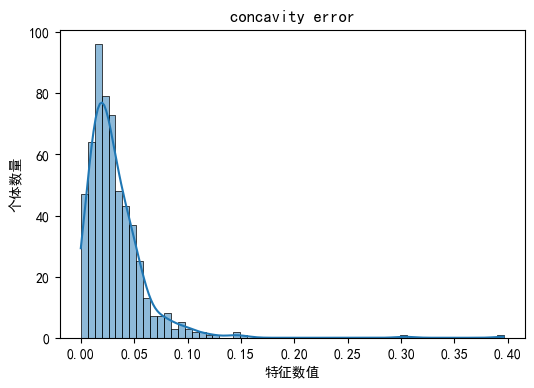

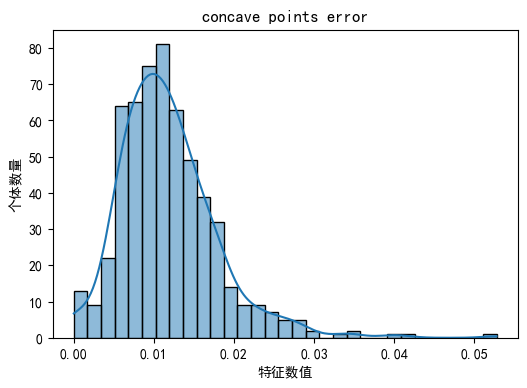

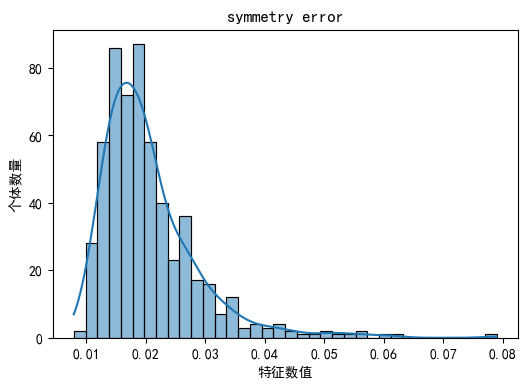

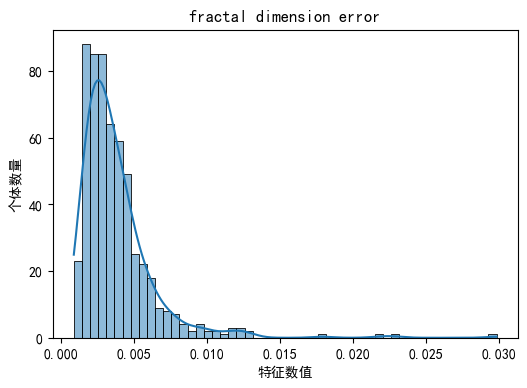

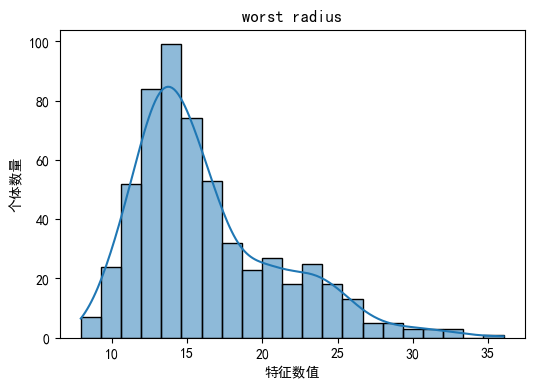

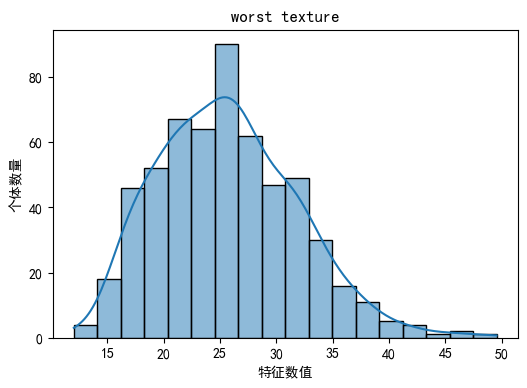

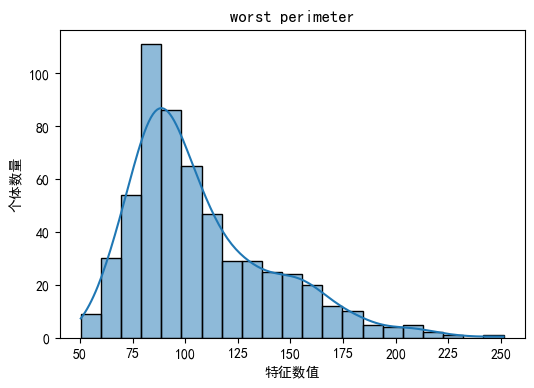

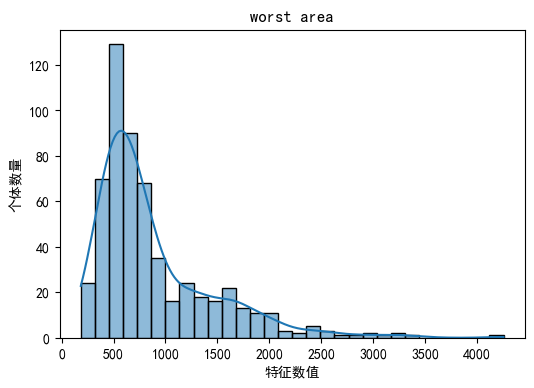

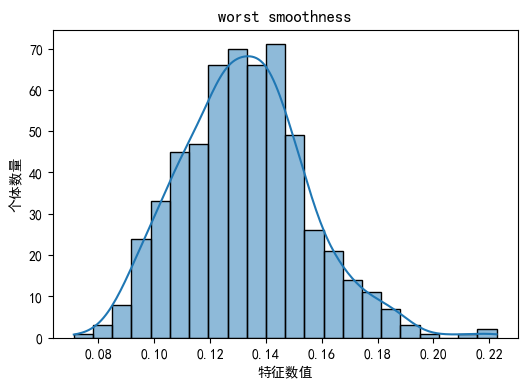

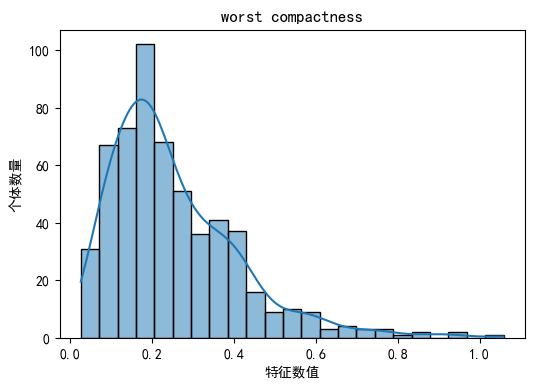

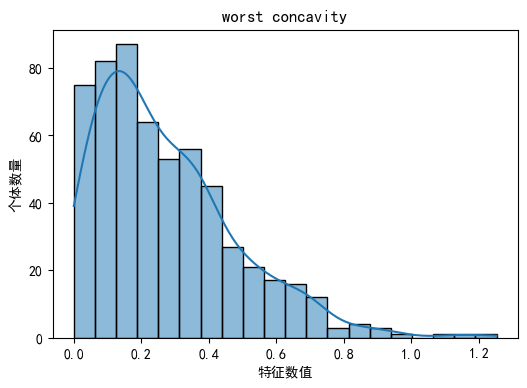

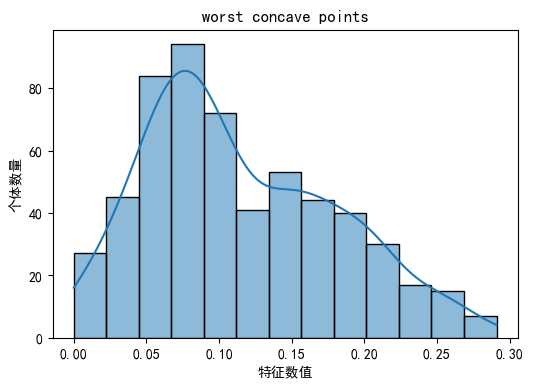

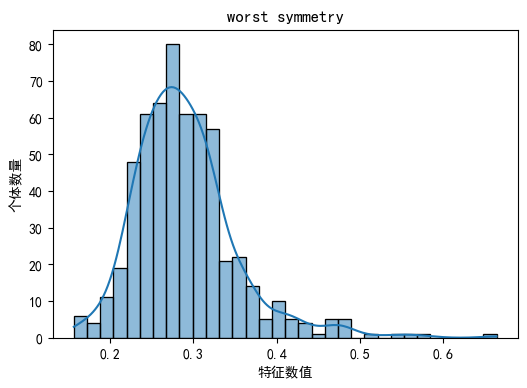

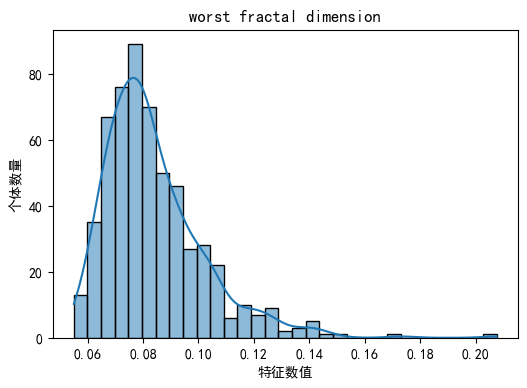

In [7]:
# 绘制特征直方图
plt.rcParams['font.family'] = 'SimHei'
for i, feature_name in enumerate(feature.columns.values): 
    plt.figure(figsize=(6, 4))
    sns.histplot(feature.iloc[:, i], kde=True)
    plt.xlabel('特征数值')
    plt.ylabel('个体数量')
    plt.title(feature_name)
    plt.show()

## 标签分布

接下来我们将查看数据集中的标签分布，0表示恶性，1表示良性。

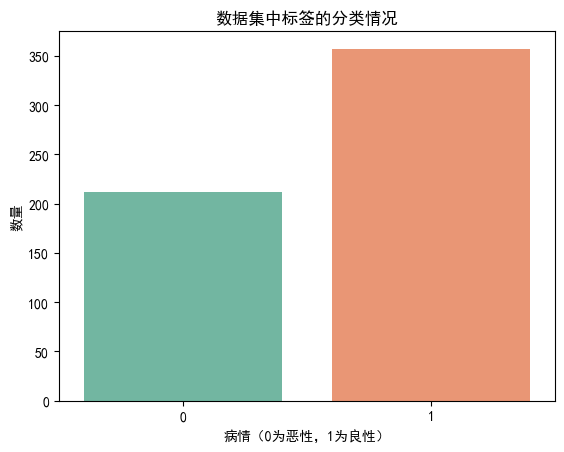

In [8]:
# 绘制标签分布图
plt.rcParams['font.family'] = 'SimHei'
sns.countplot(x=cancer['target'], palette='Set2')
plt.ylabel('数量')
plt.xlabel('病情（0为恶性，1为良性）')
plt.title('数据集中标签的分类情况')
plt.show()

## 特征之间的相关性分析

接下来我们将绘制相关性热力图，以展示特征之间的相关性。

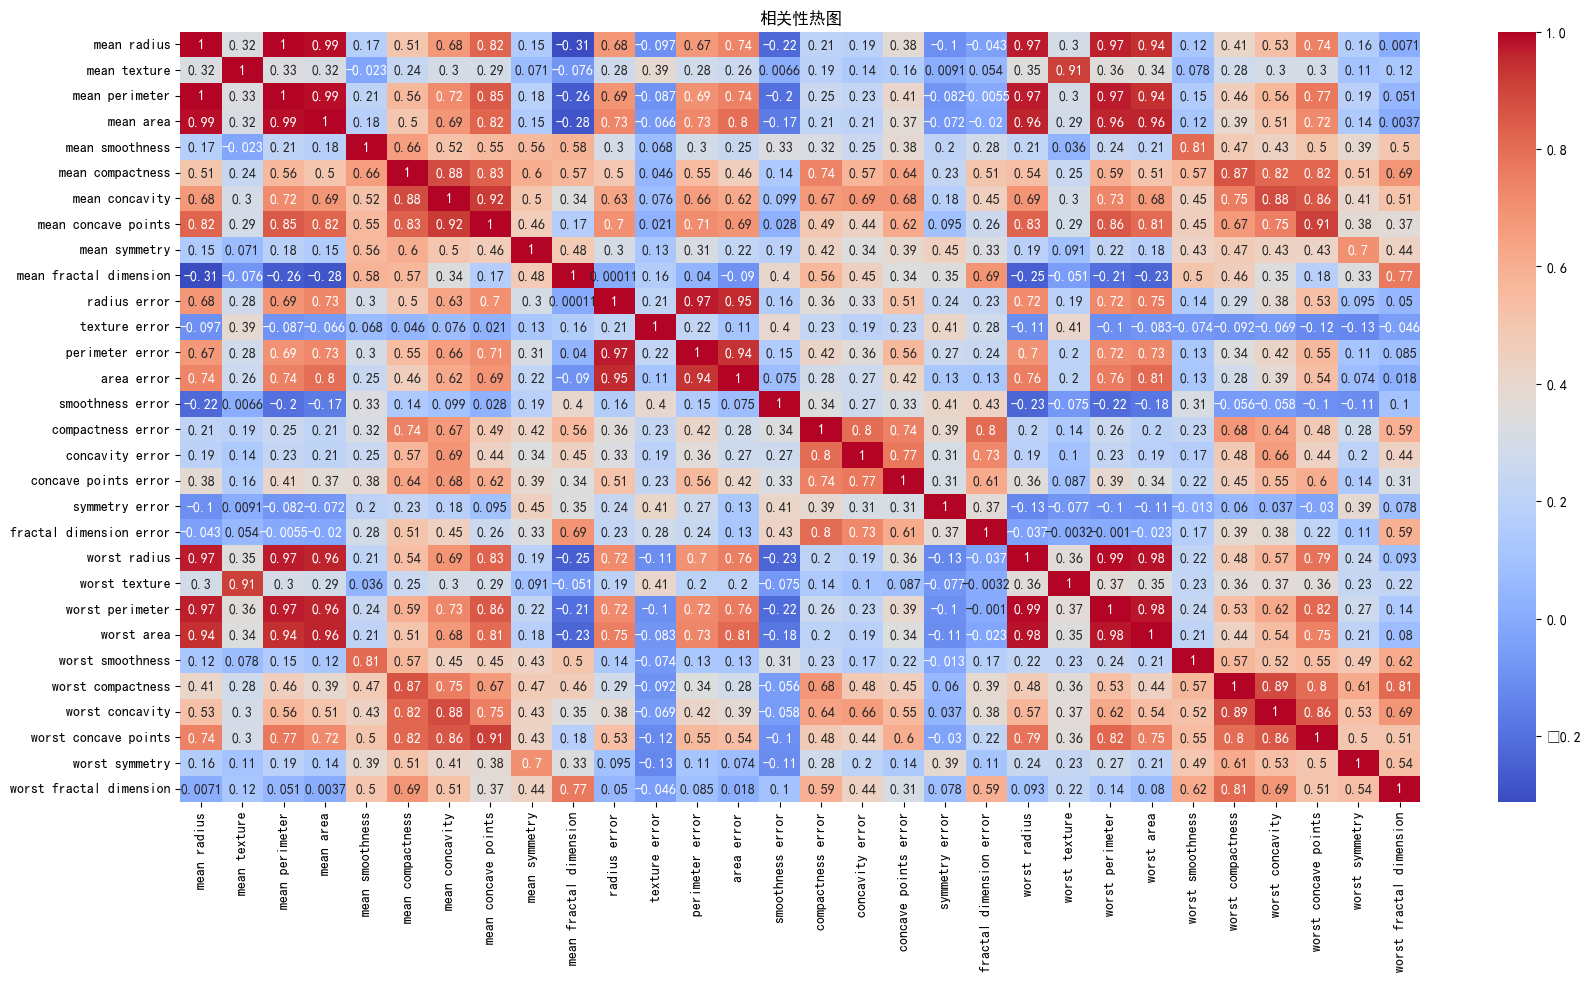

In [9]:
# 绘制相关性热力图
plt.figure(figsize=(20, 10))
sns.heatmap(feature.corr(), annot=True, cmap='coolwarm')
plt.title('相关性热图')
plt.show()

## 数据集拆分

将数据集拆分为训练集和测试集，我们将使用80%的数据进行训练，20%的数据进行测试。

In [10]:
# 划分数据集
X, y = cancer.data, cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('数据集拆分情况：')
print('=' * 30)
print('训练集：{}'.format(X_train.shape))
print('测试集：{}'.format(X_test.shape))
print('=' * 30)

数据集拆分情况：
训练集：(455, 30)
测试集：(114, 30)


## 创建决策树模型

我们使用`DecisionTreeRegressor`模型进行训练和预测，并计算模型的评估指标：均方误差(MAE)和均方根误差(MSE)。

In [11]:
# 创建决策树模型
clf = DecisionTreeRegressor(max_depth=4)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# 计算评估指标
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)


Mean Absolute Error: 0.056628056628056624
Mean Squared Error: 0.05239358439927429


## 可视化决策树

我们将决策树可视化，观察树的结构和决策规则。

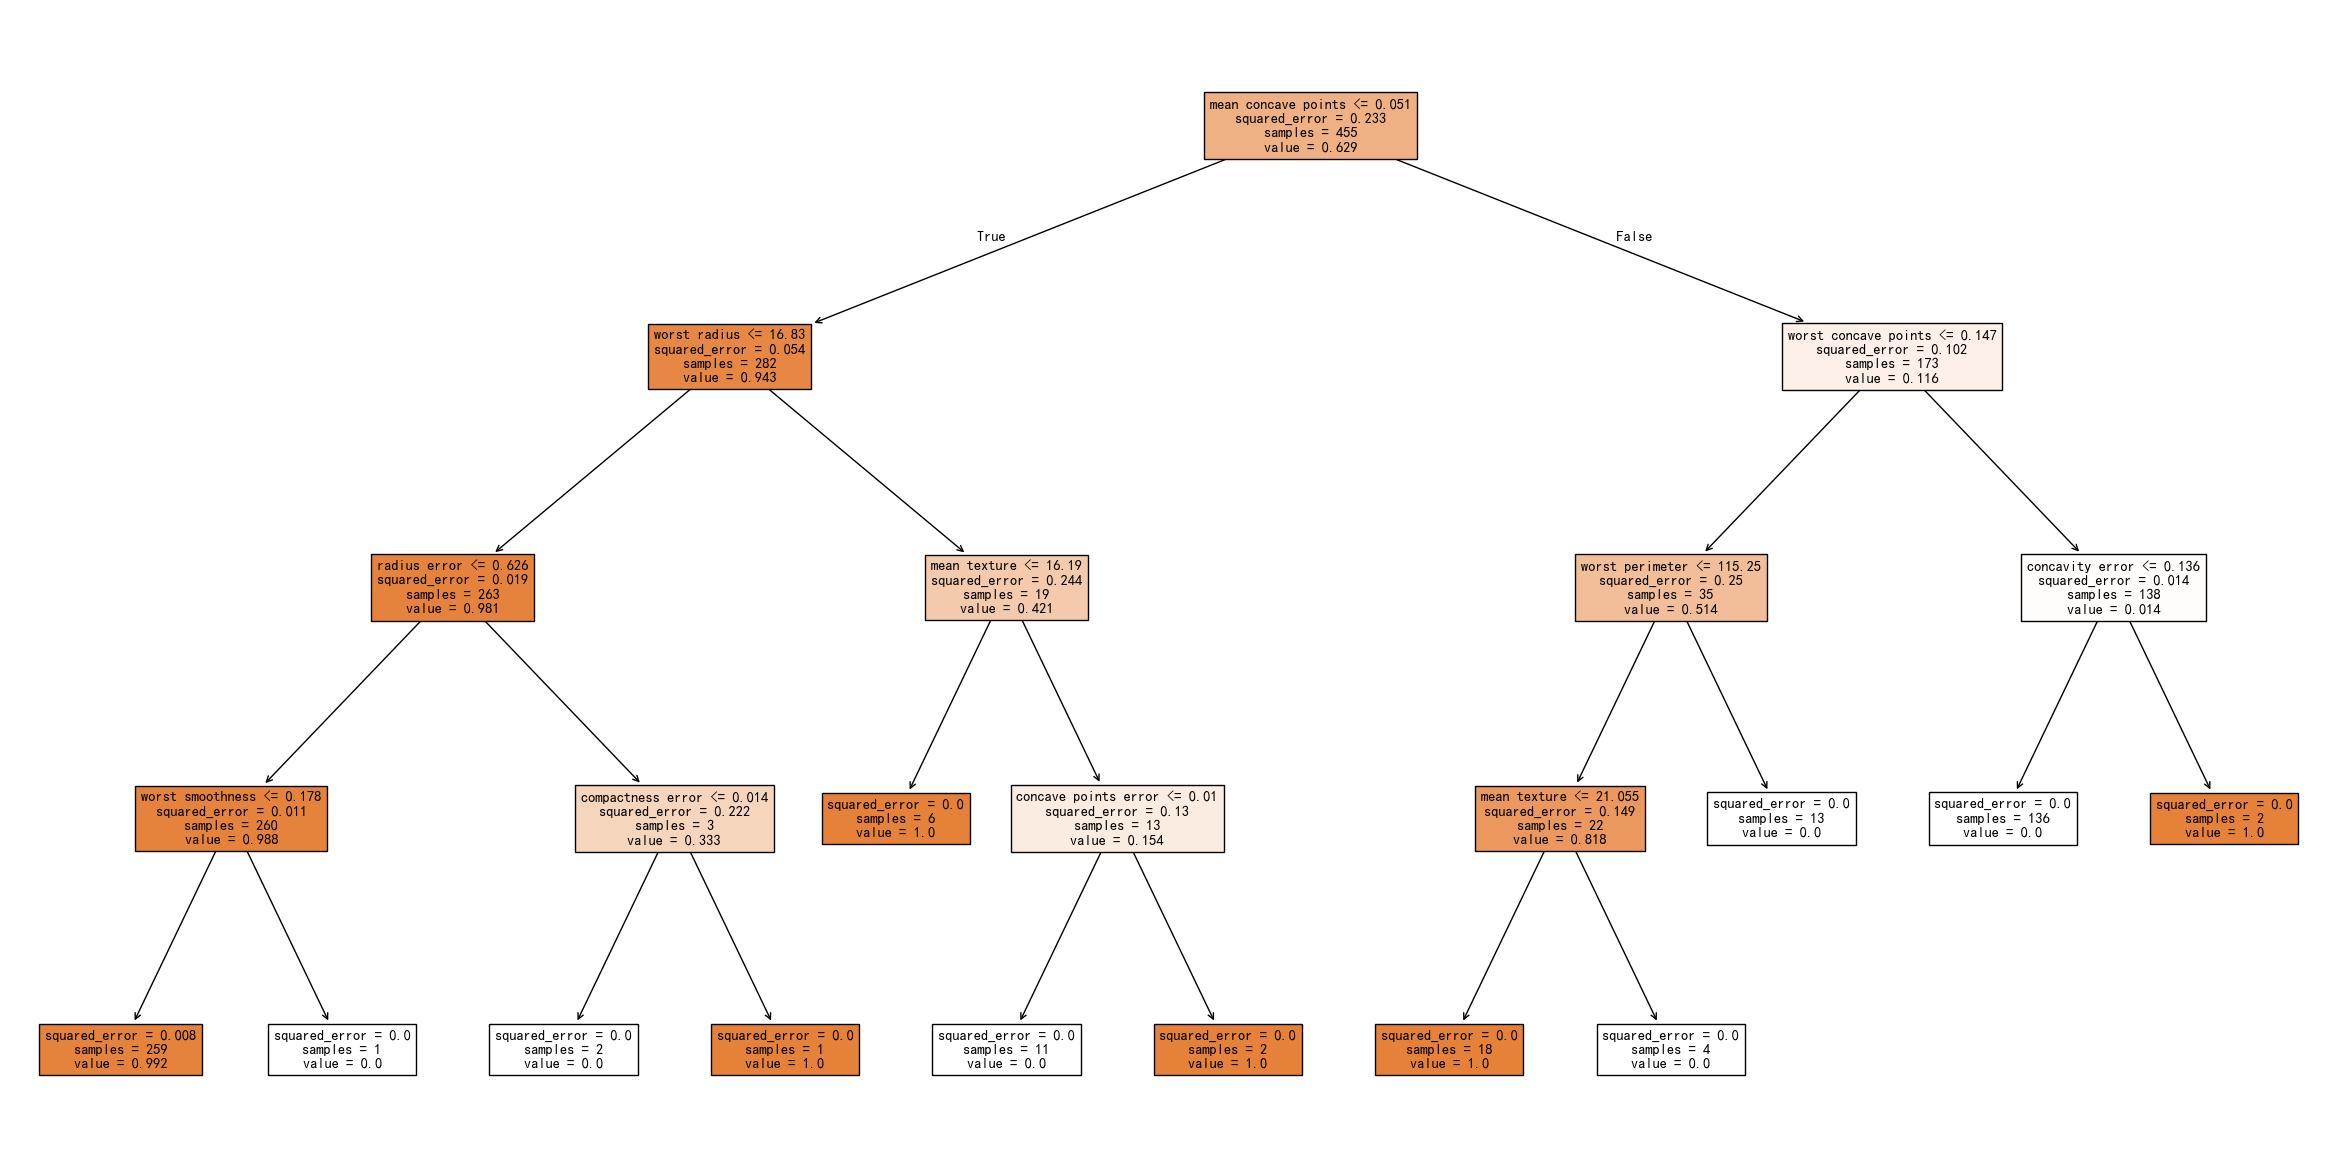

In [12]:
# 可视化决策树
plt.figure(figsize=(30, 15))
plot_tree(clf, filled=True, feature_names=cancer.feature_names)
plt.show()

## 学习曲线

绘制学习曲线以查看模型在不同训练集大小下的表现。

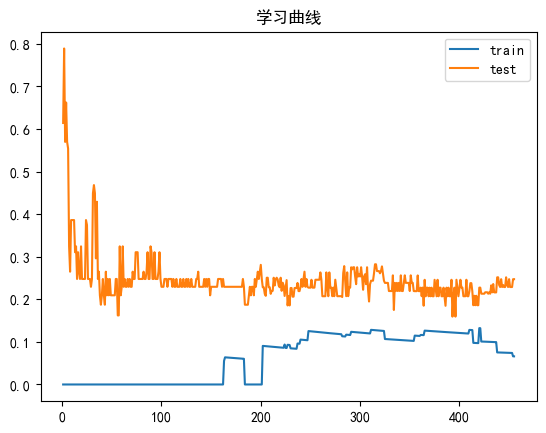

In [13]:
# 学习曲线
def plot_learning_curve(algo, X_train, X_test, y_train, y_test):
    train_scores = []
    test_scores = []
    for i in range(1, len(X_train)+1):
        algo.fit(X_train[:i], y_train[:i])
        y_train_predict = algo.predict(X_train[:i])
        train_scores.append(mean_squared_error(y_train[:i], y_train_predict))
        y_test_predict = algo.predict(X_test)
        test_scores.append(mean_squared_error(y_test, y_test_predict))
    plt.plot([i for i in range(1, len(X_train)+1)], np.sqrt(train_scores), label='train')
    plt.plot([i for i in range(1, len(X_train)+1)], np.sqrt(test_scores), label='test')
    plt.title('学习曲线')
    plt.legend()
    plt.show()

plot_learning_curve(clf, X_train, X_test, y_train, y_test)

## 混淆矩阵

接下来我们将绘制混淆矩阵，查看模型的分类性能。

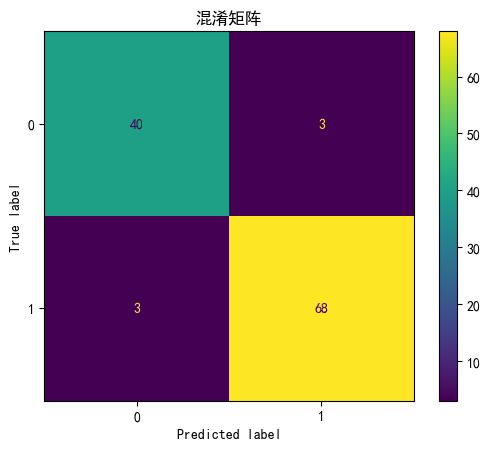

In [14]:
# 混淆矩阵
yy_pred = list(y_pred)
for i in range(114):
    if y_pred[i] > 0.9:
        yy_pred[i] = 1
cm = confusion_matrix(y_test, yy_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()
plt.title('混淆矩阵')
plt.show()

## ROC曲线

最后，我们将绘制ROC曲线并计算AUC值，以评估模型的分类效果。

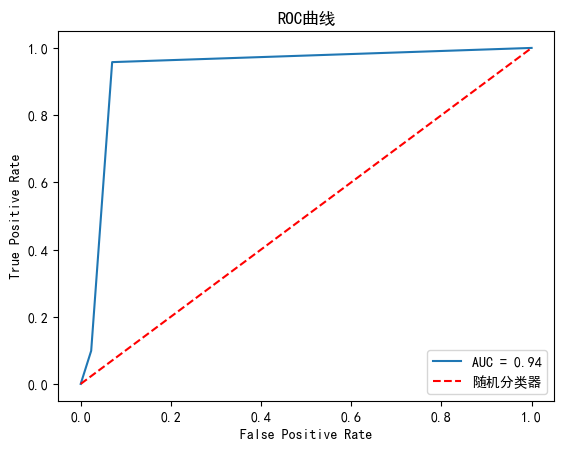

In [15]:
# ROC曲线
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='随机分类器')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC曲线')
plt.legend()
plt.show()